In [73]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [74]:
count = 0
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("_2017.csv"):
        count += 1
        print count, file

1 Abrines_Alex_2017.csv
2 Acy_Quincy_2017.csv
3 Adams_Steven_2017.csv
4 Afflalo_Arron_2017.csv
5 Ajinca_Alexis_2017.csv
6 Aldrich_Cole_2017.csv
7 Aldridge_LaMarcus_2017.csv
8 Allen_Lavoy_2017.csv
9 Allen_Tony_2017.csv
10 Aminu_Al_Farouq_2017.csv
11 Andersen_Chris_2017.csv
12 Anderson_Alan_2017.csv
13 Anderson_Justin_2017.csv
14 Anderson_Kyle_2017.csv
15 Anderson_Ryan_2017.csv
16 Antetokounmpo_Giannis_2017.csv
17 Anthony_Carmelo_2017.csv
18 Anthony_Joel_2017.csv
19 Ariza_Trevor_2017.csv
20 Arthur_Darrell_2017.csv
21 Asik_Omer_2017.csv
22 Augustin_D.J._2017.csv
23 Babbitt_Luke_2017.csv
24 Baker_Ron_2017.csv
25 Baldwin_Wade_2017.csv
26 Barbosa_Leandro_2017.csv
27 Barea_J.J._2017.csv
28 Barnes_Harrison_2017.csv
29 Barnes_Matt_2017.csv
30 Barton_Will_2017.csv
31 Bass_Brandon_2017.csv
32 Batum_Nicolas_2017.csv
33 Bayless_Jerryd_2017.csv
34 Baynes_Aron_2017.csv
35 Bazemore_Kent_2017.csv
36 Beal_Bradley_2017.csv
37 Beasley_Malik_2017.csv
38 Beasley_Michael_2017.csv
39 Belinelli_Marco_2017.csv


In [77]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("2017.csv"):
        filepath = "./basketball_reference/game_logs/" + file
#         print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

In [78]:
df.tail()

,game,date,team,loc,opp,result,gs,mp,fg,fga,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
33,34,2017-03-21,LAL,NaN,LAC,L (-24),1,35:50,8,14,...,20.1,10.5,12.4,1.4,2.6,6.3,19.0,118.0,134.0,Ivica Zubac
34,35,2017-03-24,LAL,NaN,MIN,W (+11),1,21:18,3,7,...,16.6,9.4,19.4,2.4,0.0,35.0,23.7,75.0,111.0,Ivica Zubac
35,36,2017-03-26,LAL,NaN,POR,L (-16),1,25:57,4,9,...,24.4,12.6,14.5,0.0,0.0,9.2,19.8,93.0,100.0,Ivica Zubac
36,37,2017-03-28,LAL,NaN,WAS,L (-11),1,17:42,3,8,...,18.1,12.9,7.8,5.5,3.8,0.0,24.1,124.0,108.0,Ivica Zubac
37,38,2017-03-30,LAL,@,MIN,L (-15),1,2:14,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,40.2,105.0,135.0,Ivica Zubac


In [79]:
df = df.reset_index()

In [80]:
df = df[df['team'] == "GSW"]

In [81]:
df

,index,game,date,team,loc,opp,result,gs,mp,fg,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
1665,54,55,2017-03-02,GSW,@,CHI,L (-7),0,11:49,1,...,0.0,0.0,0.0,0.0,0.0,66.7,11.2,45.0,105.0,Matt Barnes
1666,55,56,2017-03-05,GSW,@,NYK,W (+7),1,18:52,1,...,14.1,9.3,13.6,5.5,4.2,25.0,9.6,105.0,105.0,Matt Barnes
1667,56,57,2017-03-06,GSW,@,ATL,W (+8),0,17:33,1,...,31.1,21.3,21.4,0.0,5.1,33.8,21.9,89.0,111.0,Matt Barnes
1668,57,58,2017-03-08,GSW,NaN,BOS,L (-13),0,13:18,0,...,42.0,19.8,19.5,3.9,13.1,0.0,10.3,37.0,89.0,Matt Barnes
1669,58,59,2017-03-10,GSW,@,MIN,L (-1),0,10:24,2,...,20.5,10.4,14.5,0.0,0.0,0.0,8.6,244.0,113.0,Matt Barnes
1670,59,60,2017-03-11,GSW,@,SAS,L (-22),1,35:34,4,...,30.0,12.8,19.6,1.4,0.0,28.2,20.5,90.0,114.0,Matt Barnes
1671,60,61,2017-03-14,GSW,NaN,PHI,W (+2),0,22:13,3,...,30.1,20.5,16.9,2.1,3.5,20.2,17.6,115.0,95.0,Matt Barnes
1672,61,62,2017-03-16,GSW,NaN,ORL,W (+30),0,20:14,2,...,8.5,12.4,15.7,0.0,3.5,12.5,17.4,100.0,98.0,Matt Barnes
1673,62,63,2017-03-18,GSW,NaN,MIL,W (+25),0,24:04,2,...,39.9,25.2,14.6,0.0,0.0,0.0,10.2,157.0,96.0,Matt Barnes
1674,63,64,2017-03-20,GSW,@,OKC,W (+16),0,18:53,2,...,5.2,3.0,14.6,2.6,0.0,0.0,13.5,142.0,99.0,Matt Barnes


In [7]:
del df['index']

In [8]:
df.columns.values

array(['game', 'date', 'team', 'loc', 'opp', 'result', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'Name'], dtype=object)

In [9]:
# data cleaning for all game_log files
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'loc': 'Home_Game'}, inplace=True)
df['Home_Game'] = [0 if item == "@" else 1 for item in df['Home_Game']]
df['result'] = [item[3:].replace(")","") for item in df['result']]
df['result'] = df['result'].astype(float)
df['mp'] = [0 if pd.isnull(item) else round(float(item.split(":")[0]) + float(item.split(":")[1])/60. , 2) for item in df['mp']]

In [10]:
df.mp.max()

60.119999999999997

In [11]:
df[df['mp'] < 1].shape

(206, 41)

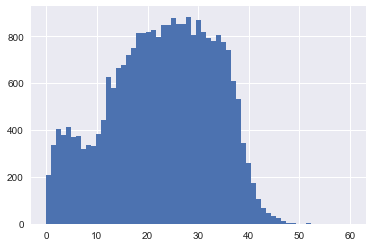

In [12]:
df['mp'].hist(bins = 61)

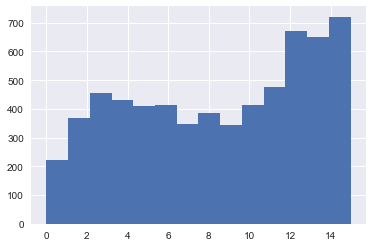

In [13]:
df[df['mp'] < 15]['mp'].hist(bins=14)

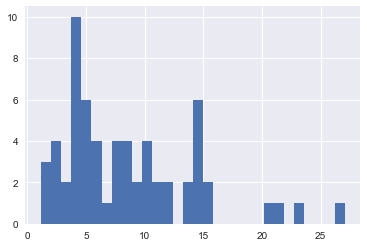

In [14]:
df[df['Name'] == "Cole Aldrich"]['mp'].hist(bins=30)

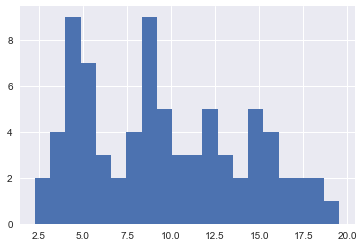

In [15]:
df[df['Name'] == "JaVale McGee"]['mp'].hist(bins=20)

In [17]:
df = df[df['mp'] > 2]

In [18]:
df.shape

(951, 41)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 1665 to 24828
Data columns (total 41 columns):
game          951 non-null int64
date          951 non-null datetime64[ns]
team          951 non-null object
Home_Game     951 non-null int64
opp           951 non-null object
result        951 non-null float64
gs            951 non-null int64
mp            951 non-null float64
fg            951 non-null int64
fga           951 non-null int64
fg_pct        916 non-null float64
fg3           951 non-null int64
fg3a          951 non-null int64
fg3_pct       531 non-null float64
ft            951 non-null int64
fta           951 non-null int64
ft_pct        519 non-null float64
orb           951 non-null int64
drb           951 non-null int64
trb           951 non-null int64
ast           951 non-null int64
stl           951 non-null int64
blk           951 non-null int64
tov           951 non-null int64
pf            951 non-null int64
pts           951 non-null int64
gmsc       

In [20]:
del df['fg_pct']
del df['fg3_pct']
del df['ft_pct']
# del df['orb_pct']
# del df['plus_minus']

In [21]:
df = df.dropna(axis=0, how='any')

In [22]:
cols = list(df.columns.values[5:-1])

In [23]:
cols = [col for col in cols if col not in ['fg_pct','fg3_pct','ft_pct','pts']] + ['Home_Game']

In [24]:
cols

['result',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'gmsc',
 'plus_minus',
 'ts_pct',
 'eFG_pct',
 'orb_pct',
 'drb_pct',
 'trb_pct',
 'ast_pct',
 'stl_pct',
 'blk_pct',
 'tov_pct',
 'usg_pct',
 'off_rtg',
 'def_rtg',
 'Home_Game']

In [25]:
df

,game,date,team,Home_Game,opp,result,gs,mp,fg,fga,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
1665,55,2017-03-02,GSW,0,CHI,-7.0,0,11.82,1,1,...,0.0,0.0,0.0,0.0,0.0,66.7,11.2,45.0,105.0,Matt Barnes
1666,56,2017-03-05,GSW,0,NYK,7.0,1,18.87,1,3,...,14.1,9.3,13.6,5.5,4.2,25.0,9.6,105.0,105.0,Matt Barnes
1667,57,2017-03-06,GSW,0,ATL,8.0,0,17.55,1,5,...,31.1,21.3,21.4,0.0,5.1,33.8,21.9,89.0,111.0,Matt Barnes
1668,58,2017-03-08,GSW,1,BOS,-13.0,0,13.30,0,3,...,42.0,19.8,19.5,3.9,13.1,0.0,10.3,37.0,89.0,Matt Barnes
1669,59,2017-03-10,GSW,0,MIN,-1.0,0,10.40,2,2,...,20.5,10.4,14.5,0.0,0.0,0.0,8.6,244.0,113.0,Matt Barnes
1670,60,2017-03-11,GSW,0,SAS,-22.0,1,35.57,4,11,...,30.0,12.8,19.6,1.4,0.0,28.2,20.5,90.0,114.0,Matt Barnes
1671,61,2017-03-14,GSW,1,PHI,2.0,0,22.22,3,7,...,30.1,20.5,16.9,2.1,3.5,20.2,17.6,115.0,95.0,Matt Barnes
1672,62,2017-03-16,GSW,1,ORL,30.0,0,20.23,2,7,...,8.5,12.4,15.7,0.0,3.5,12.5,17.4,100.0,98.0,Matt Barnes
1673,63,2017-03-18,GSW,1,MIL,25.0,0,24.07,2,4,...,39.9,25.2,14.6,0.0,0.0,0.0,10.2,157.0,96.0,Matt Barnes
1674,64,2017-03-20,GSW,0,OKC,16.0,0,18.88,2,4,...,5.2,3.0,14.6,2.6,0.0,0.0,13.5,142.0,99.0,Matt Barnes


In [26]:
X = df[cols]

In [27]:
# setting y as win/loss
# y = [1 if result > 0 else 0 for result in X['result']]
# y = pd.DataFrame(y,columns=["result"])

# setting y as ppg
y = df['pts']

In [28]:
# interaction terms
import patsy
from sklearn.preprocessing import PolynomialFeatures

formula = "%s ~ (%s)**2" % ("result", " + ".join([col for col in cols[:5] if col not in ["result"]]))
yp, Xp = patsy.dmatrices(formula, data=df, return_type="dataframe")

Xp.head(1).values

array([[  1.  ,   0.  ,  11.82,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         11.82,  11.82,   1.  ]])

In [29]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(Xp[Xp.columns[:5]].values)[0]

array([   1.    ,    1.    ,    0.    ,   11.82  ,    1.    ,    1.    ,
          1.    ,    0.    ,   11.82  ,    1.    ,    1.    ,    0.    ,
          0.    ,    0.    ,    0.    ,  139.7124,   11.82  ,   11.82  ,
          1.    ,    1.    ,    1.    ])

In [30]:
X.head(1).values

array([[  -7.  ,    0.  ,   11.82,    1.  ,    1.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    2.  ,    1.  ,   -0.7 ,   -9.  ,    1.  ,    1.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,   66.7 ,
          11.2 ,   45.  ,  105.  ,    0.  ]])

In [31]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb',\
#                 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus']])
# plt.show()

In [32]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',\
#                 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'Home_Game']])
# plt.show()

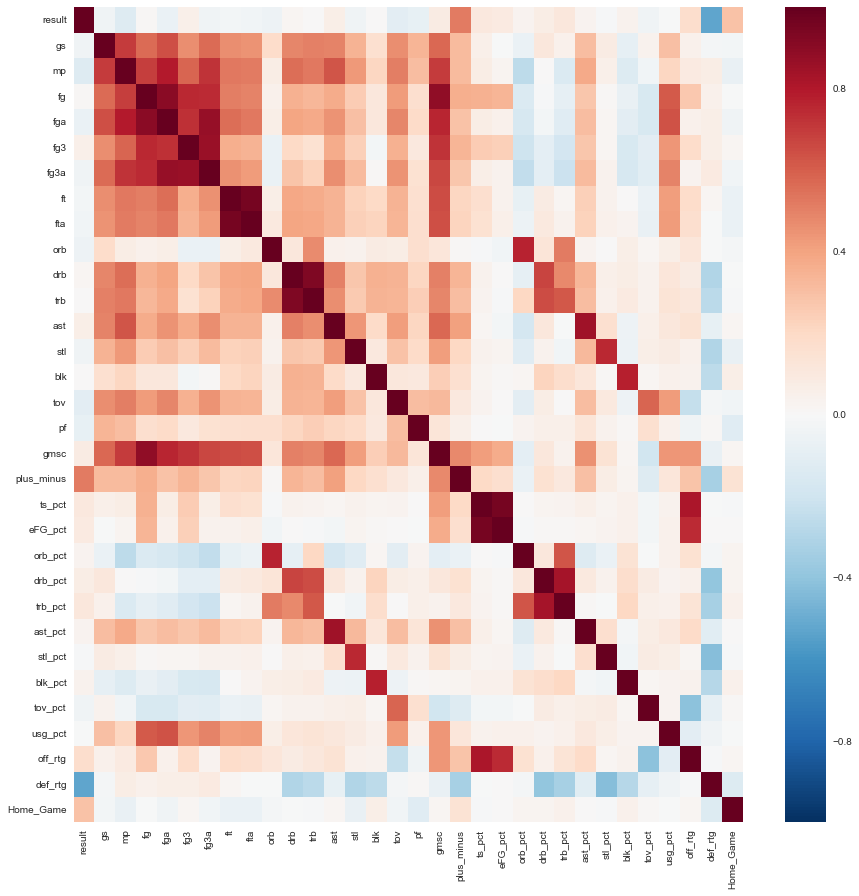

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [34]:
X.corr()['result'].sort_values(ascending=False)

result        1.000000
plus_minus    0.520369
Home_Game     0.295308
off_rtg       0.173863
trb_pct       0.111911
ts_pct        0.102080
eFG_pct       0.089033
gmsc          0.084120
drb_pct       0.071448
ast           0.062682
fg3           0.057767
blk_pct       0.042158
orb_pct       0.037209
ast_pct       0.031336
drb           0.022991
fg            0.014901
trb           0.000565
blk           0.000479
usg_pct      -0.003610
stl_pct      -0.012974
ft           -0.030470
fta          -0.032903
fg3a         -0.040199
stl          -0.042549
gs           -0.046413
tov_pct      -0.046513
orb          -0.053867
fga          -0.064669
pf           -0.081222
tov          -0.106361
mp           -0.125399
def_rtg      -0.524073
Name: result, dtype: float64

In [35]:
del X['result']
del X['gs']
del X['plus_minus']

In [36]:
X.shape

(916, 29)

In [37]:
y.shape

(916,)

In [38]:
# checking for nan's
count = 0
for col in X.columns:
    for i, row in enumerate(X[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
Xs = StandardScaler().fit_transform(X)

In [41]:
Xs = pd.DataFrame(Xs, columns=X.columns)

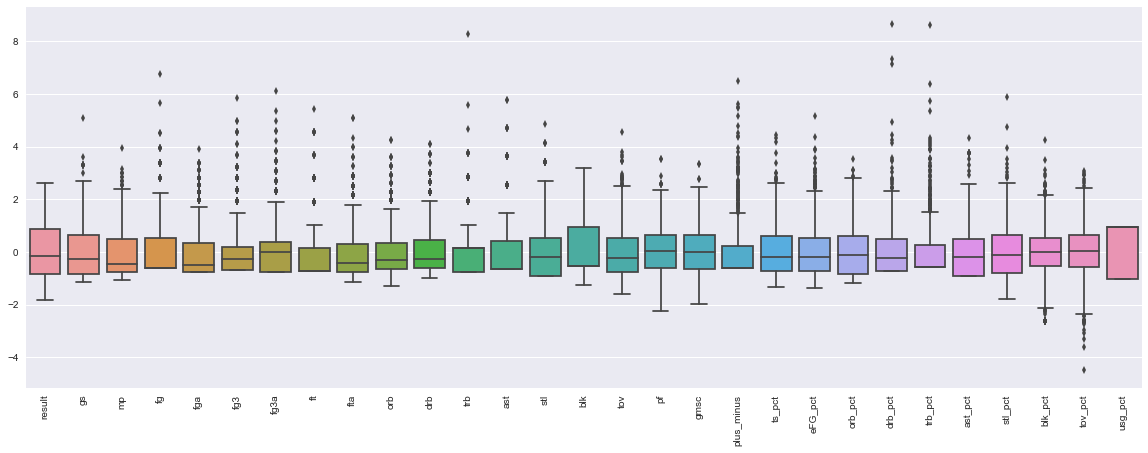

In [42]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.7, random_state=8)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(641, 29) (641,) (275, 29) (275,)


In [45]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [46]:
np.logspace(0,3,10)

array([    1.        ,     2.15443469,     4.64158883,    10.        ,
          21.5443469 ,    46.41588834,   100.        ,   215.443469  ,
         464.15888336,  1000.        ])

In [47]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
gs_params = {
    'penalty':['l2'],#['l1','l2'],
    'solver':['liblinear'],
    'C': np.logspace(0,3,10)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1, n_jobs=4)

In [48]:
lr_gridsearch.fit(X_train, np.ravel(y_train))

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2'], 'C': array([    1.     ,     2.15443,     4.64159,    10.     ,    21.54435,
          46.41589,   100.     ,   215.44347,   464.15888,  1000.     ]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [49]:
lr_gridsearch.best_score_

0.26989079563182528

In [50]:
# {'C': 7.9248289835391752, 'penalty': 'l2', 'solver': 'liblinear'} = 0.767
# {'C': 464.15888336127773, 'penalty': 'l2', 'solver': 'liblinear'} = 0.285 for ppg
lr_gridsearch.best_params_

{'C': 464.15888336127773, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
best_lr = lr_gridsearch.best_estimator_
best_lr.score(X_test, y_test)

0.33818181818181819

In [52]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })
coef_df['abs_coef'] = np.abs(coef_df.coef)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [53]:
coef_df

,coef,feature,abs_coef
16,-9.221792,ts_pct,9.221792
15,4.112129,gmsc,4.112129
4,2.878287,fg3a,2.878287
2,-2.692633,fga,2.692633
0,-2.411234,mp,2.411234
3,2.311187,fg3,2.311187
26,-2.188454,off_rtg,2.188454
25,-1.788550,usg_pct,1.788550
6,-1.782959,fta,1.782959
17,-1.600163,eFG_pct,1.600163


In [54]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [55]:
dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X_train, np.ravel(y_train), cv=5)
scores

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.33108108,  0.34782609,  0.37795276,  0.40517241,  0.39285714])

In [58]:
print dtc.score(X_train, y_train)
print dtc.score(X_test, y_test)

0.377535101404
0.378181818182


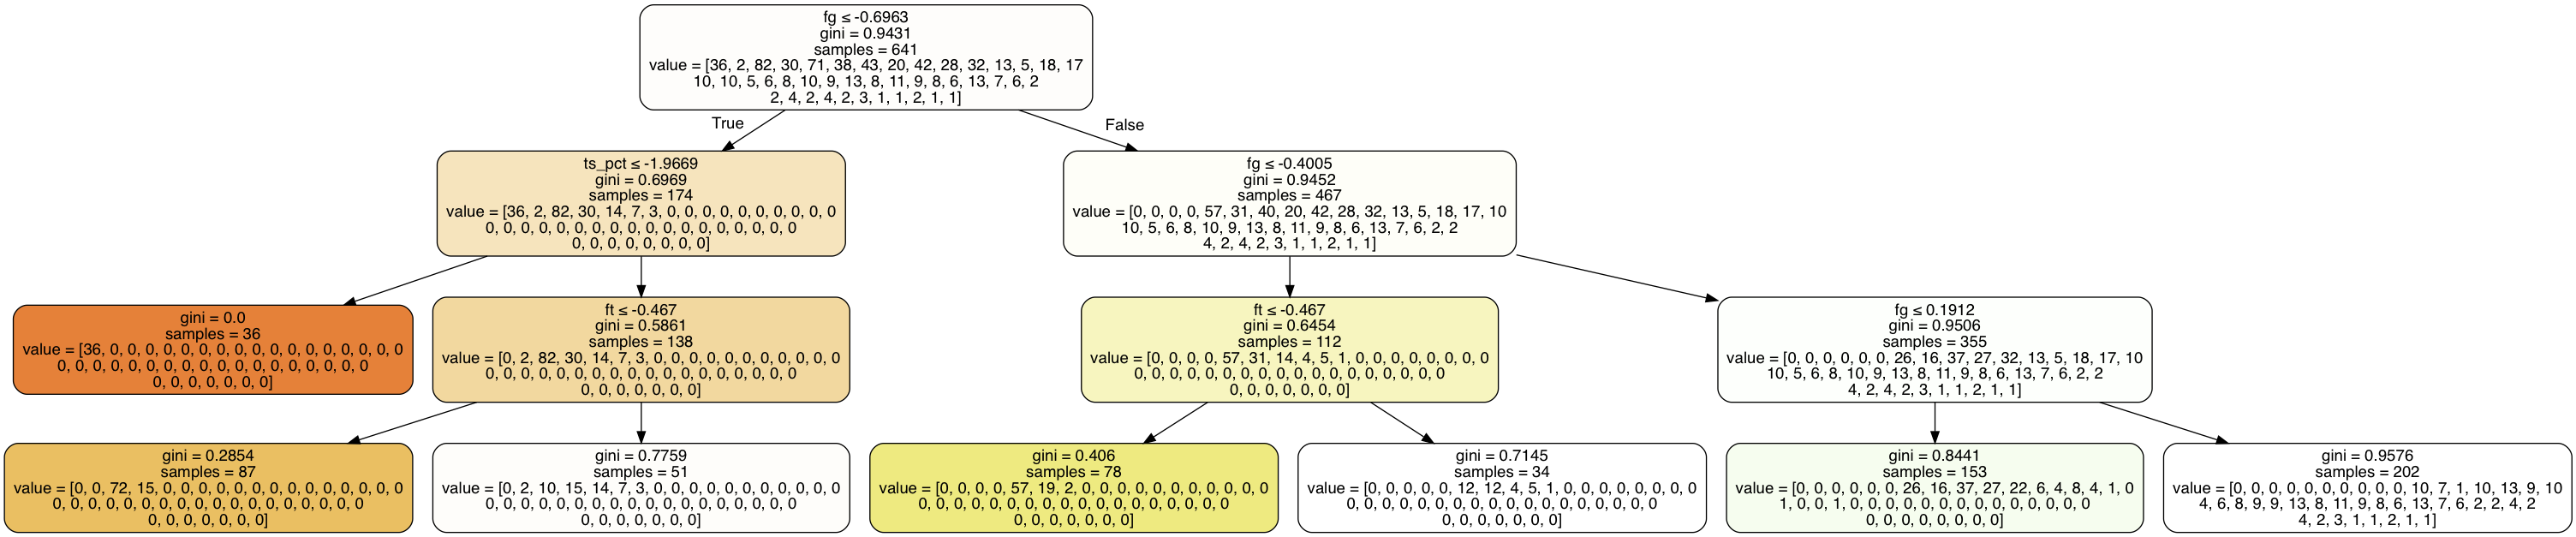

In [59]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [60]:
pd.DataFrame(dtc.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False)

,feature_importances
fg,0.547049
ts_pct,0.249859
ft,0.203092
mp,0.000000
def_rtg,0.000000
off_rtg,0.000000
usg_pct,0.000000
tov_pct,0.000000
blk_pct,0.000000
stl_pct,0.000000


In [61]:
rfc = RandomForestClassifier()#min_samples_leaf=5, )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [62]:
print rfc.score(X_train, y_train)
print rfc.score(X_test, y_test)

0.992199687988
0.487272727273


In [63]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False)

,feature_importances
fg,0.117578
gmsc,0.077927
ts_pct,0.063189
fga,0.056847
off_rtg,0.054709
usg_pct,0.050947
mp,0.048938
fg3,0.048091
eFG_pct,0.046033
ft,0.043563


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
from sklearn.metrics import classification_report

In [66]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [67]:
lr = LinearRegression().fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

1.0
1.0


In [69]:
linear_ppg = pd.DataFrame(lr.predict(X_test).ravel(), columns=['linear_ppg'], index=y_test.index)

In [70]:
ppg = pd.concat([y_test,linear_ppg], axis=1)

In [71]:
ppg['Diff'] = ppg['pts'] - ppg['linear_ppg']

In [72]:
ppg

,pts,linear_ppg,Diff
24794,8,8.000000e+00,-1.776357e-15
16357,9,9.000000e+00,5.329071e-15
4563,11,1.100000e+01,1.776357e-15
5497,21,2.100000e+01,-1.421085e-14
16765,2,2.000000e+00,5.329071e-15
6816,10,1.000000e+01,7.105427e-15
11737,7,7.000000e+00,-8.881784e-16
16351,11,1.100000e+01,1.065814e-14
9197,9,9.000000e+00,0.000000e+00
6792,15,1.500000e+01,3.552714e-15
